<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;"> Capitulo 1.-Resolver ecuaciones diferenciales ordinarias con  SymPy (Python)</span>

##Comandos basicos para resolver ecuaciones diferenciales en Simpy

Python
Para  resolver  con  SymPy  usamos  dsolve  con  la  sintaxis:
<span style="color:blue;">sympy.solvers.ode.dsolve(eq,func=None,hint'default’,simplify=True,ics=None,xi=None, eta=None,x0=0,n=6,**kwargs).</span>

importamos la librerías SymPy a Python

In [ ]:
import sympy as sp
import numpy as exp

Definimos las variables independiente y dependiente ası como los parametros de forma simbolica

In [ ]:
t=sp.symbols('t')
p=sp.Function('p')
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

Ahora definimos la ecuación diferencial con la condición inicial usando dsolve:

In [ ]:
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
sol = sp.dsolve(ode,p(t),ics={p(0):p0})

Obteniendo así la solución:
<span style="color:blue;">Nota: poner sp.Eq("...") para q defina la función</span>

In [ ]:
sp.Eq(p(t), a*sp.exp(a*(t+sp.log(b*p0/(-a+b*p0))/a))/(b*(sp.exp(a*(t+sp.log(b*p0/(-a + b*p0))/a)) - 1)))

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

Definimos a continuación los valores de a,b y p0, y evaluamos las respectivas soluciones (una para cada condición inicial):

In [ ]:
constants={a:0.03,b:0.0001,p0:5}
sol1=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

La función lambdify permite definir una función a partir de la expresión simbolica:

In [ ]:
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

A continuación, importamos los módulos scipy, matplotlib y pyplot para graficar nuestras soluciones:

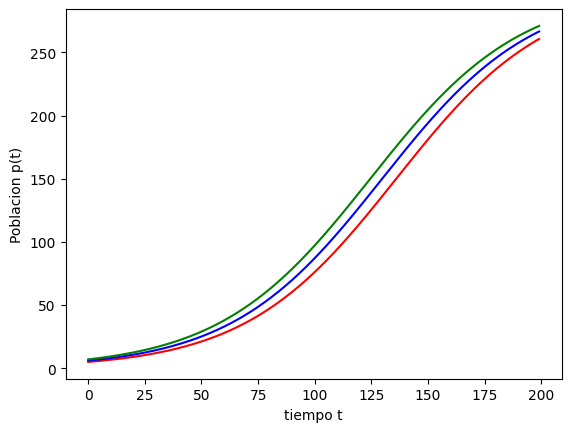

In [ ]:
import numpy as np # Import numpy
import scipy
tt = np.arange(0,200,1) # Use np.arange
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()

Como observamos, la función anterior nos recomienda algunos de los métodos que podríamos usar como ayudas (hints) para resolver esta ecuación.

In [ ]:
sol=dsolve(ode,p(t))
sol

Eq(p(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

##  <span style="color:purple;"> **Capitulo 2.** Ecuación de Lagrange: $y= 2xy′+ log(y′)$: </span>

In [ ]:
from sympy import *
import sympy as sp
x=sp.symbols('x')
y=sp.Function('y')
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
sol2 = sp.dsolve(ode2,y(x))

Para obtener:

In [ ]:
Eq(C1-y(x)-log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))),0)

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

##  <span style="color:purple;"> **Capitulo 5.** Una ecuación homogénea de Cauchy-Euler de cuarto orden: </span>

 esta dada de la forma $x^4y^4(x) + 6x^3y^3(x) + 9x^2y′′(x) + 3xy′(x) +y(x) = 0$

importamos la libreria

In [ ]:
from sympy import *
import sympy as sp

definimos las variables de la EDO

In [ ]:
x=sp.symbols('x')
y=sp.Function('y')
C1, C2, C3, C4 = symbols("C1, C2, C3, C4")
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
sol5 = sp.dsolve(ode5,y(x))

para asi obtener

In [ ]:
Eq(y(x),C3*sin(log(x))+C4*cos(log(x))+ (C1*sin(log(x))+C2*cos(log(x)))*log(x))

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

La literatura nos dice que un metodo de solucion de las ecuaciones de Cauchy Euler implica la substitucion $y=x^n$.

In [ ]:
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

##  <span style="color:purple;"> **Capitulo 6.** Una ecuacion con problema de valor inicial con deltas de Dirac como fuentes: </span>

Dada la ecuacion $y′′(t)−4y′(t) + 4y(t) = 3δ(t−1) +δ(t−2),  \quad  y(0) = 1,  y′(0) = 1.$

In [ ]:
from sympy import *
import sympy as sp

Definimos las funciones y las variables

In [ ]:
t=sp.symbols('t')
y=sp.Function('y')
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
sol6 = sp.dsolve(ode6)
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
sol6.subs(constants)

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

Para obtener

In [ ]:
Eq(y(t), (t*(exp(-4)*Heaviside(t-2)+3*exp(-2)*Heaviside(t-1)-1)-2*exp(-4)*Heaviside(t-2) - 3*exp(-2)*Heaviside(t-1)+1)*exp(2*t))

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

*Nota: este tipo de ecuacion diferencial requiere para su solucion, la tecnica de transformada de Laplace (incluida en el  comando  dsolve). Modificar  las fuentes $Δ(t−t_0)$ para diferentes valores de $t_0$ y observar el efecto que causa en las soluciones*

##  <span style="color:purple;"> **Capitulo 7.** Una ecuacion-Sistema masa-resorte:$mx′′(t) +ke−αtx(t) = 0$.: </span>

In [ ]:
from sympy import *
import sympy as sp


In [ ]:
t=sp.symbols('t')
y=sp.Function('y')
m=sp.symbols('m')
k=sp.symbols('k')
a=sp.symbols('a')
ode7=sp.Eq(m*sp.Derivative(y(t),t,t)+k*exp(-a*t)*y(t),0)
sol7 = sp.dsolve(ode7,y(t))

Para obtener

In [ ]:
Eq(y(t),C2*(k**2*t**4*exp(-2*a*t)/(24*m**2)-k*t**2*exp(-a*t)/(2*m)+1) +C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

Eq(y(t), C2*(k**2*t**4*exp(-2*a*t)/(24*m**2) - k*t**2*exp(-a*t)/(2*m) + 1) + C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

##  <span style="color:purple;"> **Capitulo 12.** Problema de valor inicial para una ecuación no lineal (solución numérica): </span>
 Dada la ecuación $y′(t) = sen(y^2(t)), \quad y(0) = 1.$


importamos la librerías

In [99]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
sin = np.sin

Definimos ahora la funci ́on que define el lado derecho de la ecuación diferencial $\frac{dy}{dt}=f(y, t)$

In [103]:
def model(y,t):
  dydt=sin(y*y)
  return dydt

y0 = 1
t=np.linspace(0,20)

Resolvemos numéricamente con odeint:
y graficamos

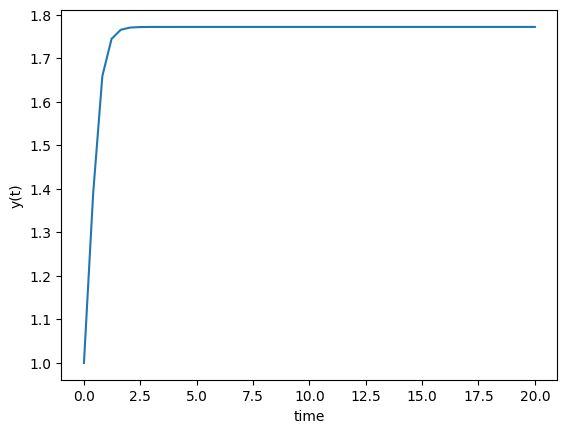

In [104]:
y=odeint(model,y0,t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()